In [40]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


## T

In [13]:
T = pd.read_csv("T.csv")
T

,date,test_daily,test_cum
0,2020-01-27,20,20
1,2020-01-28,8,28
2,2020-01-29,5,33
3,2020-01-30,1,34
4,2020-01-31,3,37
...,...,...,...
268,2020-10-21,45176,1931191
269,2020-10-22,46389,1977580
270,2020-10-23,45186,2022766
271,2020-10-24,38864,2061630


## FB

In [160]:
#FB = pd.read_csv("FB.txt", sep = "\t")
#FB = FB[FB.country=='CZE']
#FB.to_csv("FB_CZE.csv")
FB = pd.read_csv("FB_CZE.csv")
region_coding = {
    'CZE.1_1': 'Ceske Budejovice',
    'CZE.2_1': 'Brno',
    'CZE.3_1': 'Karlovy Vary',
    'CZE.4_1': 'Jihlava',
    'CZE.5_1': 'Hradec Kralove',
    'CZE.6_1': 'Liberec',
    'CZE.7_1': 'Ostrava',
    'CZE.8_1': 'Olomouc',
    'CZE.9_1': 'Pardubice',
    'CZE.10_1': 'Plzen',
    'CZE.11_1': 'Praha',
    'CZE.12_1': 'Stredocesky',
    'CZE.13_1': 'Usti',
    'CZE.14_1': 'Zlin'
}
FB['region_name'] = FB['polygon_id'].apply(lambda x: region_coding[x])
FB = FB.merge(pd.read_csv('region_inhabitans.csv'), how='left', on="region_name")
FB['all_day_bing_tiles_visited_count_change'] = FB['all_day_bing_tiles_visited_relative_change'] * FB['inhabitans']
FB['all_day_single_tile_users'] = FB['all_day_ratio_single_tile_users'] * FB['inhabitans']
FB

,Unnamed: 0,ds,country,polygon_source,polygon_id,polygon_name,all_day_bing_tiles_visited_relative_change,all_day_ratio_single_tile_users,baseline_name,baseline_type,region_name,inhabitans,all_day_bing_tiles_visited_count_change,all_day_single_tile_users
0,1216539,2020-03-01,CZE,GADM,CZE.10_1,NaN,0.03969,0.27700,full_february,DAY_OF_WEEK,Plzen,590461,23435.39709,163557.69700
1,1216540,2020-03-02,CZE,GADM,CZE.10_1,NaN,0.04003,0.14216,full_february,DAY_OF_WEEK,Plzen,590461,23636.15383,83939.93576
2,1216541,2020-03-03,CZE,GADM,CZE.10_1,NaN,-0.03595,0.17218,full_february,DAY_OF_WEEK,Plzen,590461,-21227.07295,101665.57498
3,1216542,2020-03-04,CZE,GADM,CZE.10_1,NaN,-0.01282,0.15398,full_february,DAY_OF_WEEK,Plzen,590461,-7569.71002,90919.18478
4,1216543,2020-03-05,CZE,GADM,CZE.10_1,NaN,-0.00481,0.15201,full_february,DAY_OF_WEEK,Plzen,590461,-2840.11741,89755.97661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3327,1219866,2020-10-20,CZE,GADM,CZE.9_1,Pardubický,-0.07176,0.19815,full_february,DAY_OF_WEEK,Pardubice,523054,-37534.35504,103643.15010
3328,1219867,2020-10-21,CZE,GADM,CZE.9_1,Pardubický,-0.04729,0.19177,full_february,DAY_OF_WEEK,Pardubice,523054,-24735.22366,100306.06558
3329,1219868,2020-10-22,CZE,GADM,CZE.9_1,Pardubický,-0.10316,0.20024,full_february,DAY_OF_WEEK,Pardubice,523054,-53958.25064,104736.33296
3330,1219869,2020-10-23,CZE,GADM,CZE.9_1,Pardubický,-0.15269,0.21023,full_february,DAY_OF_WEEK,Pardubice,523054,-79865.11526,109961.64242


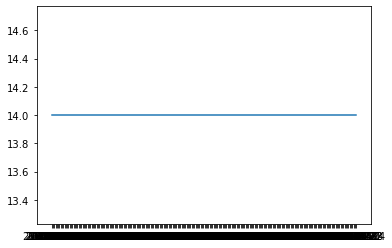

In [156]:
plt.plot(FB.ds.value_counts(dropna=False).sort_index())

## GOOGLE

In [18]:
GO = pd.read_csv("GO.csv")
GO

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,CZ,Czechia,NaN,NaN,NaN,NaN,NaN,2020-02-15,13.0,8.0,37.0,14.0,3.0,-2
1,CZ,Czechia,NaN,NaN,NaN,NaN,NaN,2020-02-16,12.0,8.0,28.0,9.0,2.0,-1
2,CZ,Czechia,NaN,NaN,NaN,NaN,NaN,2020-02-17,4.0,2.0,17.0,1.0,-2.0,0
3,CZ,Czechia,NaN,NaN,NaN,NaN,NaN,2020-02-18,9.0,5.0,22.0,2.0,-2.0,0
4,CZ,Czechia,NaN,NaN,NaN,NaN,NaN,2020-02-19,4.0,1.0,6.0,-2.0,-2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3730,CZ,Czechia,Zlín Region,NaN,NaN,CZ-ZL,NaN,2020-10-16,-42.0,1.0,-15.0,-35.0,-24.0,16
3731,CZ,Czechia,Zlín Region,NaN,NaN,CZ-ZL,NaN,2020-10-17,-52.0,1.0,-9.0,-32.0,-11.0,10
3732,CZ,Czechia,Zlín Region,NaN,NaN,CZ-ZL,NaN,2020-10-18,-44.0,-6.0,25.0,-26.0,-13.0,6
3733,CZ,Czechia,Zlín Region,NaN,NaN,CZ-ZL,NaN,2020-10-19,-31.0,-1.0,36.0,-27.0,-24.0,12


In [19]:
GO.sub_region_1.value_counts(dropna=False)

Moravian-Silesian Region    249
Hradec Králové Region       249
Pardubice Region            249
Vysočina Region             249
South Moravian Region       249
Plzeň Region                249
South Bohemian Region       249
Ústí nad Labem Region       249
Zlín Region                 249
Liberec Region              249
Olomouc Region              249
Central Bohemian Region     249
Prague                      249
Karlovy Vary Region         249
NaN                         249
Name: sub_region_1, dtype: int64

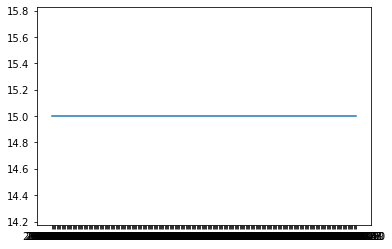

In [20]:
plt.plot(GO.date.value_counts(dropna=False).sort_index())

## Face masks

In [93]:
MU = pd.read_csv("MU.csv", sep = ";")
MU

,date,face_masks_level,face_masks,desc
0,2020-01-01,0,nothing,NaN
1,2020-03-17,3,traffic_somewhere,roušky v MHD v Praze
2,2020-03-18,10,everywhere,pobyt na všech místech mimo bydliště pouze s r...
3,2020-05-05,9,almost_everywhere,"přidané výjimky, nové opatření"
4,2020-05-26,8,inside_traffic_outside_somewhere,"roušky ve vnitřních prostorách, v MHD, venku t..."
5,2020-06-15,7,inside_traffic_mass,"roušky ve vnitřních prostorách, v MHD, na venk..."
6,2020-07-01,2,traffic_somewhere,"zrušení celoplošných opatření, zůstávají v Pra..."
7,2020-09-10,5,inside_traffic,"roušky ve všech vnitřních prostorech, v MHD"
8,2020-09-24,6,inside_traffic_schools,"roušky ve školách Praha, roušky na hromadných ..."
9,2020-10-13,6,inside_traffic_schools,"roušky ve vnitřních prostorách, v MHD včetně n..."


# MERGING

## aggregating FB

In [163]:
FBg = FB.groupby('ds').agg({"all_day_bing_tiles_visited_count_change": sum, "all_day_single_tile_users": sum, "inhabitans": sum})
FBg["all_day_bing_tiles_visited_relative_change"] = FBg["all_day_bing_tiles_visited_count_change"]/FBg["inhabitans"]
FBg["all_day_ratio_single_tile_users"] = FBg["all_day_single_tile_users"]/FBg["inhabitans"]

## aggregating Google

In [164]:
GO

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,CZ,Czechia,NaN,NaN,NaN,NaN,NaN,2020-02-15,13.0,8.0,37.0,14.0,3.0,-2
1,CZ,Czechia,NaN,NaN,NaN,NaN,NaN,2020-02-16,12.0,8.0,28.0,9.0,2.0,-1
2,CZ,Czechia,NaN,NaN,NaN,NaN,NaN,2020-02-17,4.0,2.0,17.0,1.0,-2.0,0
3,CZ,Czechia,NaN,NaN,NaN,NaN,NaN,2020-02-18,9.0,5.0,22.0,2.0,-2.0,0
4,CZ,Czechia,NaN,NaN,NaN,NaN,NaN,2020-02-19,4.0,1.0,6.0,-2.0,-2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3730,CZ,Czechia,Zlín Region,NaN,NaN,CZ-ZL,NaN,2020-10-16,-42.0,1.0,-15.0,-35.0,-24.0,16
3731,CZ,Czechia,Zlín Region,NaN,NaN,CZ-ZL,NaN,2020-10-17,-52.0,1.0,-9.0,-32.0,-11.0,10
3732,CZ,Czechia,Zlín Region,NaN,NaN,CZ-ZL,NaN,2020-10-18,-44.0,-6.0,25.0,-26.0,-13.0,6
3733,CZ,Czechia,Zlín Region,NaN,NaN,CZ-ZL,NaN,2020-10-19,-31.0,-1.0,36.0,-27.0,-24.0,12


In [165]:
GOg = GO.set_index('date', inplace=False)
GOg = GOg[GOg.sub_region_1.isna()][[
    'retail_and_recreation_percent_change_from_baseline',
    'grocery_and_pharmacy_percent_change_from_baseline',
    'parks_percent_change_from_baseline',
    'transit_stations_percent_change_from_baseline',
    'workplaces_percent_change_from_baseline',
    'residential_percent_change_from_baseline'    
]]

## aggregating MU

In [166]:
MUg = MU.copy()
MUg.index = pd.to_datetime(MUg['date'], infer_datetime_format=True)
MUg = MUg.drop('date', axis=1)

## own merging

In [167]:
data = T
data.index = pd.to_datetime(data['date'], infer_datetime_format=True)
data = data.drop('date', axis=1)
data = data.join(FBg, how='left')
data = data.join(GOg, how='left')
data = pd.merge_asof(data, MUg, left_index=True, right_index=True)

In [168]:
data

,test_daily,test_cum,all_day_bing_tiles_visited_count_change,all_day_single_tile_users,inhabitans,all_day_bing_tiles_visited_relative_change,all_day_ratio_single_tile_users,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,face_masks_level,face_masks,desc
date,,,,,,,,,,,,,,,,
2020-01-27,20,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,nothing,NaN
2020-01-28,8,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,nothing,NaN
2020-01-29,5,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,nothing,NaN
2020-01-30,1,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,nothing,NaN
2020-01-31,3,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,nothing,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-21,45176,1931191,-5.862530e+05,2.064647e+06,10694364.0,-0.054819,0.193059,NaN,NaN,NaN,NaN,NaN,NaN,8,inside_traffic_outside_somewhere,"roušky taky venku, pokud nelze dodržovat rozes..."
2020-10-22,46389,1977580,-1.289531e+06,2.289057e+06,10694364.0,-0.120580,0.214043,NaN,NaN,NaN,NaN,NaN,NaN,8,inside_traffic_outside_somewhere,"roušky taky venku, pokud nelze dodržovat rozes..."
2020-10-23,45186,2022766,-1.732933e+06,2.369153e+06,10694364.0,-0.162042,0.221533,NaN,NaN,NaN,NaN,NaN,NaN,8,inside_traffic_outside_somewhere,"roušky taky venku, pokud nelze dodržovat rozes..."


In [170]:
data.columns

Index(['test_daily', 'test_cum', 'all_day_bing_tiles_visited_count_change',
       'all_day_single_tile_users', 'inhabitans',
       'all_day_bing_tiles_visited_relative_change',
       'all_day_ratio_single_tile_users',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline', 'face_masks_level',
       'face_masks', 'desc'],
      dtype='object')